In [1]:
import numpy as np
import numpy.ma as ma
from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
input = [line.rstrip() for line in open('data/day3_input.txt')]

input_to_array = []


for line in input:
    new_line = list(line)
    input_to_array.append(new_line)

input_to_array = np.array(input_to_array)

print (np.unique(input_to_array))

symbols = ['*', '$', '#', '+', '@', '=', '/', '%', '-', '&']

are_symbols = np.isin(input_to_array, symbols)
symbol_index = np.where(are_symbols == True)

symbol_adj = are_symbols.copy().astype(int) # make mask of 0s and 1s

for i in range(len(symbol_index[0])):
    row = symbol_index[0][i]
    col = symbol_index[1][i]
    if ((row != 0) & (row != symbol_adj.shape[0]) & (col != 0) & (col != symbol_adj.shape[1])):
        symbol_adj[row-1, col-1] = 1
        symbol_adj[row-1, col] = 1
        symbol_adj[row-1, col+1] = 1
        symbol_adj[row, col-1] = 1
        symbol_adj[row, col+1] = 1
        symbol_adj[row+1, col-1] = 1
        symbol_adj[row+1, col] = 1
        symbol_adj[row+1, col+1] = 1



just_numbers = np.char.isdigit(input_to_array)

adjacent = just_numbers*symbol_adj


num_array = []

for row in range(adjacent.shape[0]):

    clusters = ndimage.label(just_numbers[row,:])

    okie_dokie = clusters[0] * adjacent[row,:]
    good_cluster = np.unique(okie_dokie[okie_dokie != 0])

    for cluster in good_cluster:
        values = list(input_to_array[row,:][clusters[0] == cluster])
        num_array.append(int(''.join(values)))
        
        
        
print (sum(num_array))

    





['#' '$' '%' '&' '*' '+' '-' '.' '/' '0' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '=' '@']
535351


846 624
922 965
359 405
332 960
740 38
I am aligned on  1 with 243 156
806 634
481 3
143 775
273 463
313 452
58 593
392 772
196 566
544 20
541 132
216 747
638 969
971 716
245 855
20 871
I am aligned on  8 with 91 192
I am aligned on  8 with 852 156
47 55
128 68
I am aligned on  9 with 333 415
939 858
520 998
380 761
491 379
275 118
739 924
992 964
I am aligned on  13 with 488 240
674 648
465 756
583 868
124 851
827 697
304 41
80 272
312 487
729 961
736 632
I am aligned on  19 with 502 118
753 669
889 374
272 120
141 698
546 776
330 804
663 730
446 803
167 201
170 484
587 196
773 23
19 455
789 959
287 941
794 647
146 887
496 860
790 161
I am aligned on  27 with 325 738
156 252
511 420
166 959
I am aligned on  28 with 935 689
210 770
3 8
I am aligned on  29 with 141 606
I am aligned on  29 with 193 111
542 342
244 860
I am aligned on  32 with 613 245
51 394
834 875
882 835
866 489
739 177
I am aligned on  35 with 5 557
290 104
634 141
719 787
673 739
575 784
794 309
369 989
934 643
997 8

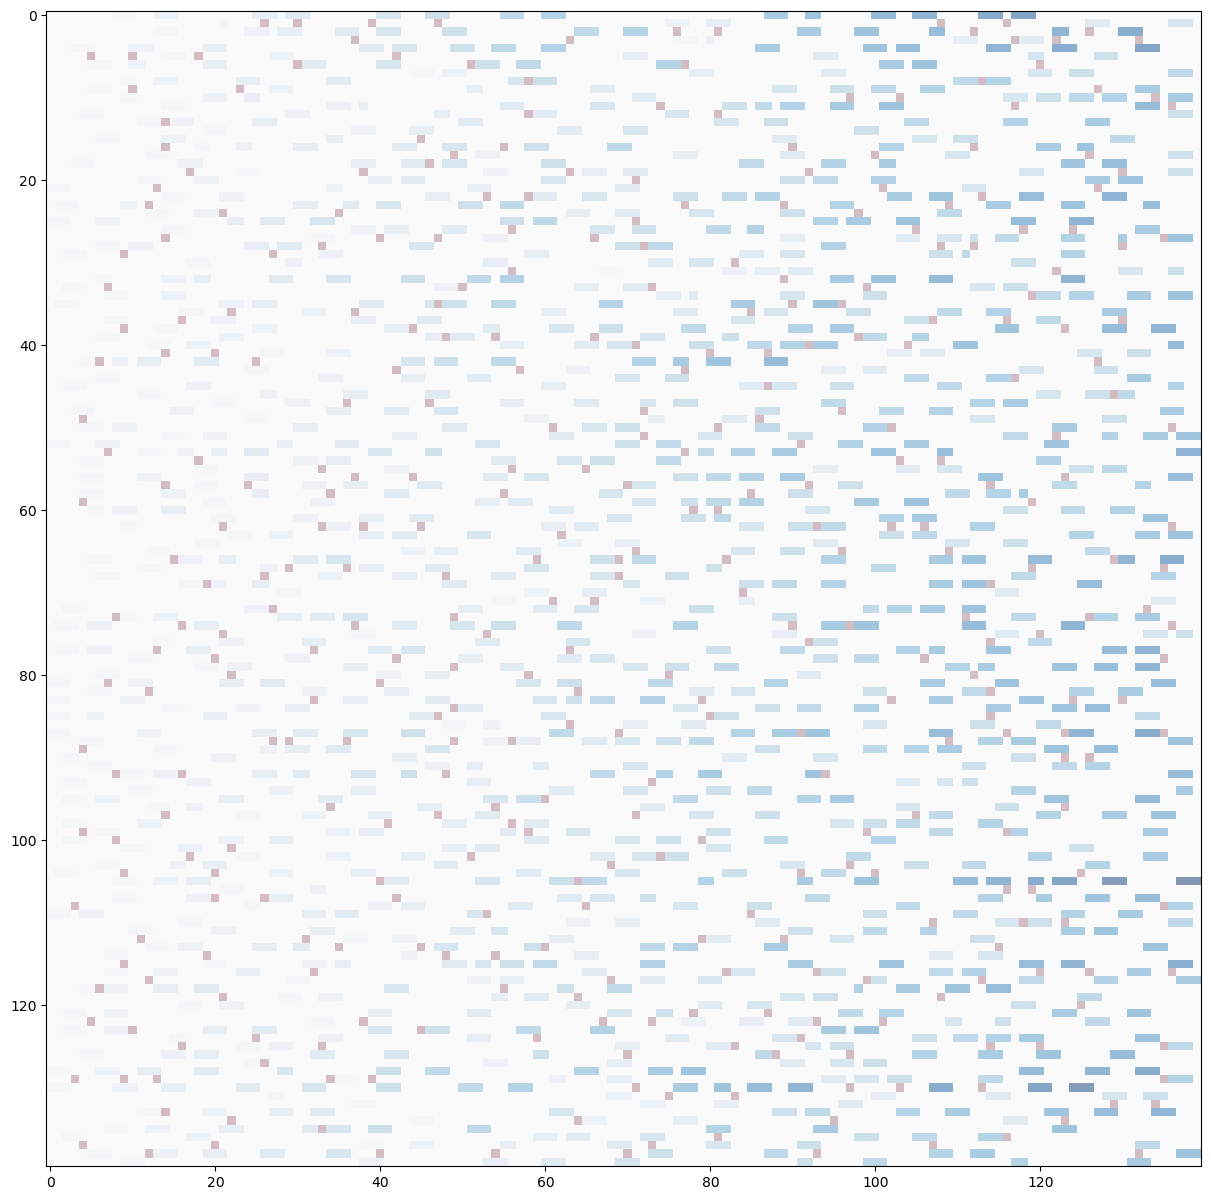

In [81]:
input = [line.rstrip() for line in open('data/day3_input.txt')]

input_to_array = []


for line in input:
    new_line = list(line)
    input_to_array.append(new_line)

input_to_array = np.array(input_to_array)





just_numbers = np.char.isdigit(input_to_array)

row_clusters = []
for j in range(just_numbers.shape[0]):    
    clusters = ndimage.label(just_numbers[j,:])
    row_clusters.append(clusters[0])

row_clusters=np.array(row_clusters)
symbols = ['*']

are_symbols = np.isin(input_to_array, symbols)
symbol_index = np.where(are_symbols == True)

symbol_adj = are_symbols.copy().astype(int) # make mask of 0s and 1s, only using in this cell for plotting



products = []
for i in range(len(symbol_index[0])):
    row = symbol_index[0][i]
    col = symbol_index[1][i]
    if ((row != 0) & (row != symbol_adj.shape[0]) & (col != 0) & (col != symbol_adj.shape[1])):
        number_overlap = row_clusters[row-1:row+2, col-1:col+2] # find the places where number clusters overlap the symbol's valid box
        non_zero_overlap = np.nonzero(number_overlap) # find all indices where the number overlap != zero, ie where there are digits
        if len(np.unique(non_zero_overlap[0])) == 2: #ensure there are digits on more than one row
            value_one_row = row+non_zero_overlap[0][0] - 1 #find the first row with a value...in the original input dataset

            first_cluster_val = number_overlap[non_zero_overlap[0][0], non_zero_overlap[1][0]] #get the integer cluster number number from the wee 3x3 array
            row_one_slice_nums = input_to_array[value_one_row, :] # slice to just the row we care about
            row_one_slice_cluster = row_clusters[value_one_row, :]
            value1 = int(''.join(list(row_one_slice_nums[row_one_slice_cluster == first_cluster_val]))) #only extract values from input data slice where we know the row cluster number valid
            value_two_row = row+non_zero_overlap[0][-1] - 1 # find the second row with a value...in the original input dataset

            second_cluster_val = number_overlap[non_zero_overlap[0][-1], non_zero_overlap[1][-1]]
            row_two_slice_nums = input_to_array[value_two_row, :]
            row_two_slice_cluster = row_clusters[value_two_row, :]
            value2 = int(''.join(list(row_two_slice_nums[row_two_slice_cluster == second_cluster_val])))
            print (value1, value2)
            products.append(value1*value2)
        if len(np.unique(non_zero_overlap[0])) == 1: #possible to have solutions on same row aligned with the star
            if (len(np.unique(non_zero_overlap[1])) == 2): #make sure there are at least two unique columns
                first_cluster_val = number_overlap[non_zero_overlap[0][0], non_zero_overlap[1][0]]
                second_cluster_val = number_overlap[non_zero_overlap[0][-1], non_zero_overlap[1][-1]]

                if (first_cluster_val != second_cluster_val): # make sure there are two unique clusters on the line

                    value_one_row = row+non_zero_overlap[0][0] - 1
                    row_one_slice_nums = input_to_array[value_one_row, :]
                    row_one_slice_cluster = row_clusters[value_one_row, :]
                    value1 = int(''.join(list(row_one_slice_nums[row_one_slice_cluster == first_cluster_val])))
                    value_two_row = row+non_zero_overlap[0][-1] - 1
                    row_two_slice_nums = input_to_array[value_two_row, :]
                    row_two_slice_cluster = row_clusters[value_two_row, :]
                    value2 = int(''.join(list(row_two_slice_nums[row_two_slice_cluster == second_cluster_val])))
                    print ('I am aligned on ', row, 'with', value1, value2)
                    products.append(value1*value2)
        


print (len(symbol_index[0]))
print (len(products))
print (sum(products))

plt.figure(figsize=(15,15))
plt.imshow(symbol_adj, cmap='Reds', alpha=0.5)
plt.imshow(row_clusters, cmap='Blues', alpha=0.5)
plt.show()


